<h1><b>FINAL PROJECT UJIAN AKHIR SEMESTER GENAP</b></h1>

<h2><b>Big Data And Predictive Analytics</b></h2>

<h5>Anggota Kelompok :</h5>
<ol>
    <li><p>Haikal Raditya Fadhilah</p></li>
    <li><p>Wulan Kristiyanti</p></li>
    <li><p>Gilang Ramadhani</p></li>
</ol>


<h2><b>IMPORT LIBRARY</b></h2>

In [189]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy as stats

<h2><b>IMPORT DATASET</b></h2>


In [190]:
df = pd.read_csv('./DATASET/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<h3><b>MEMPERSIAPKAN DATA</b></h3>
<p><b>1) Melihat Jumlah Baris Dan Column Dataset</b></p>

In [191]:
df.shape

(145460, 23)

<p><b>2) Melihat tipe data tiap kolom dari dataset</b></p>

In [192]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

<p><b>3 Melihat data kolom apakah ada yang terdapat data kosong (NA) dan menghitung serta membersihkan data NULL</b></p>

In [193]:
df.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [194]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [195]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
56416,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
56417,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
56418,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [196]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<p><b>4) Mengurangi Column yang tidak di gunakan</b></p>

In [197]:
df.drop(columns=[ 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],inplace=True);

<h3><b>EDA (Exploratory Data Analytics)</b></h3>
<p><b>1.Print DataFrame</b></p>

In [198]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0
...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0
56416,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0
56417,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0
56418,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0


<p><b>2.Melihat 10 Data Teratas</b></p>

In [199]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0
5,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0
6,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0
7,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0
8,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0
9,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0


<p><b>3.Melihat 10 Data Terakhir</b></p>

In [200]:
df.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
56410,2017-06-15,Darwin,19.0,30.9,0.0,5.0,10.8,E,41.0
56411,2017-06-16,Darwin,18.9,31.1,0.0,6.0,10.6,ESE,31.0
56412,2017-06-17,Darwin,20.2,32.1,0.0,4.8,9.9,E,31.0
56413,2017-06-18,Darwin,20.0,33.1,0.0,4.6,10.9,E,43.0
56414,2017-06-19,Darwin,21.9,33.0,0.0,5.2,10.9,E,44.0
56415,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0
56416,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0
56417,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0
56418,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0
56419,2017-06-24,Darwin,20.2,31.7,0.0,5.6,10.7,ENE,30.0


<p><b>3.Melihat Nama-nama Column Dari Dataset</b></p>

In [201]:
df.columns  

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed'],
      dtype='object')

<p><b>4.Melihat Informasi column dataset</b></p>

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.9+ MB


<p><b>5.Melihat deskripsi dari dataset</b></p>

In [203]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000


<h3><b>VISUALIASI DATA</b></h3>


<p><b>1. Memvisualiasikan Data Rainfall Dengan menggunakan Line Chart</b></p>

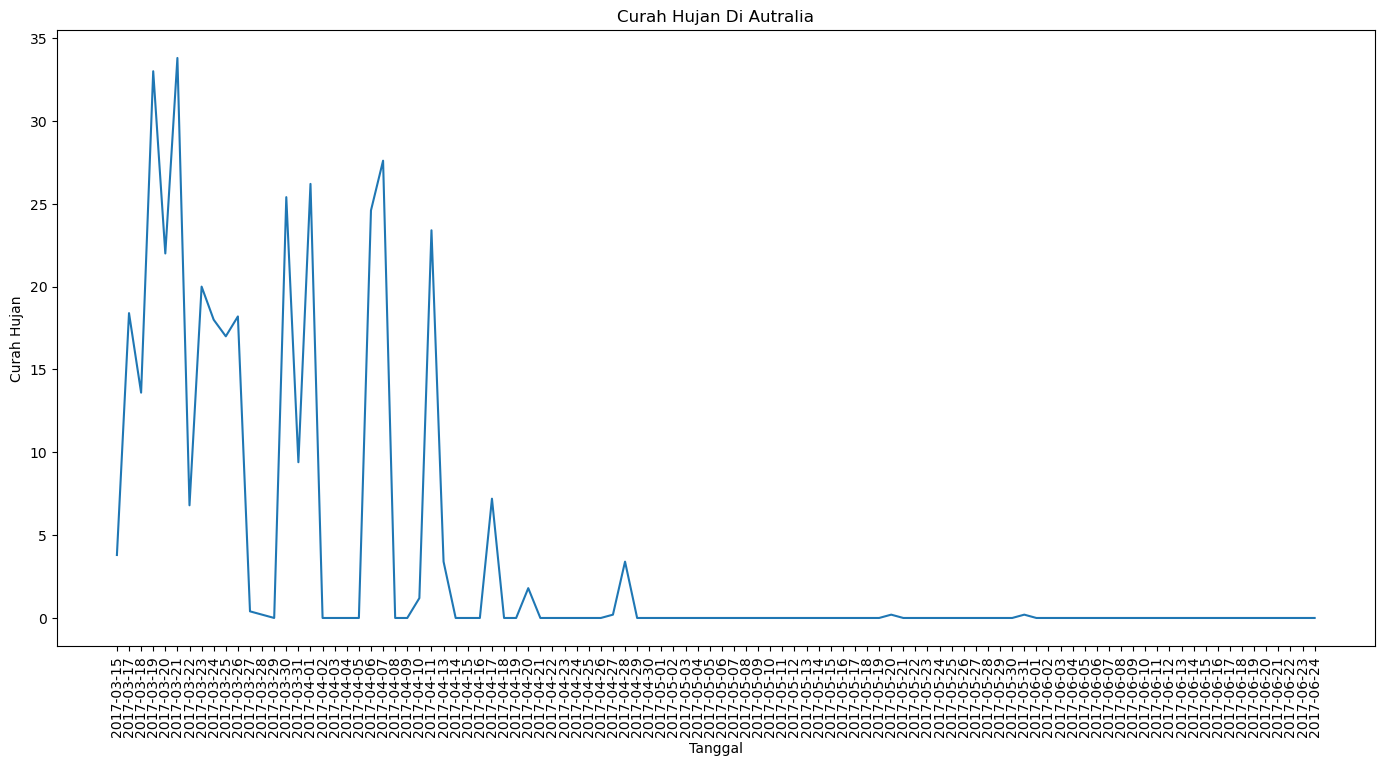

In [204]:
ax = plt.subplots(figsize=(17,8))
plt.plot(df['Date'].tail(100),df['Rainfall'].tail(100))
plt.xticks(rotation=90)
plt.title("Curah Hujan Di Autralia")
plt.xlabel("Tanggal")
plt.ylabel("Curah Hujan")
plt.show()

<p><b>2.Mevisualisasikan Data Max Dan Min Temperature Dengan Line Chart</b></p>

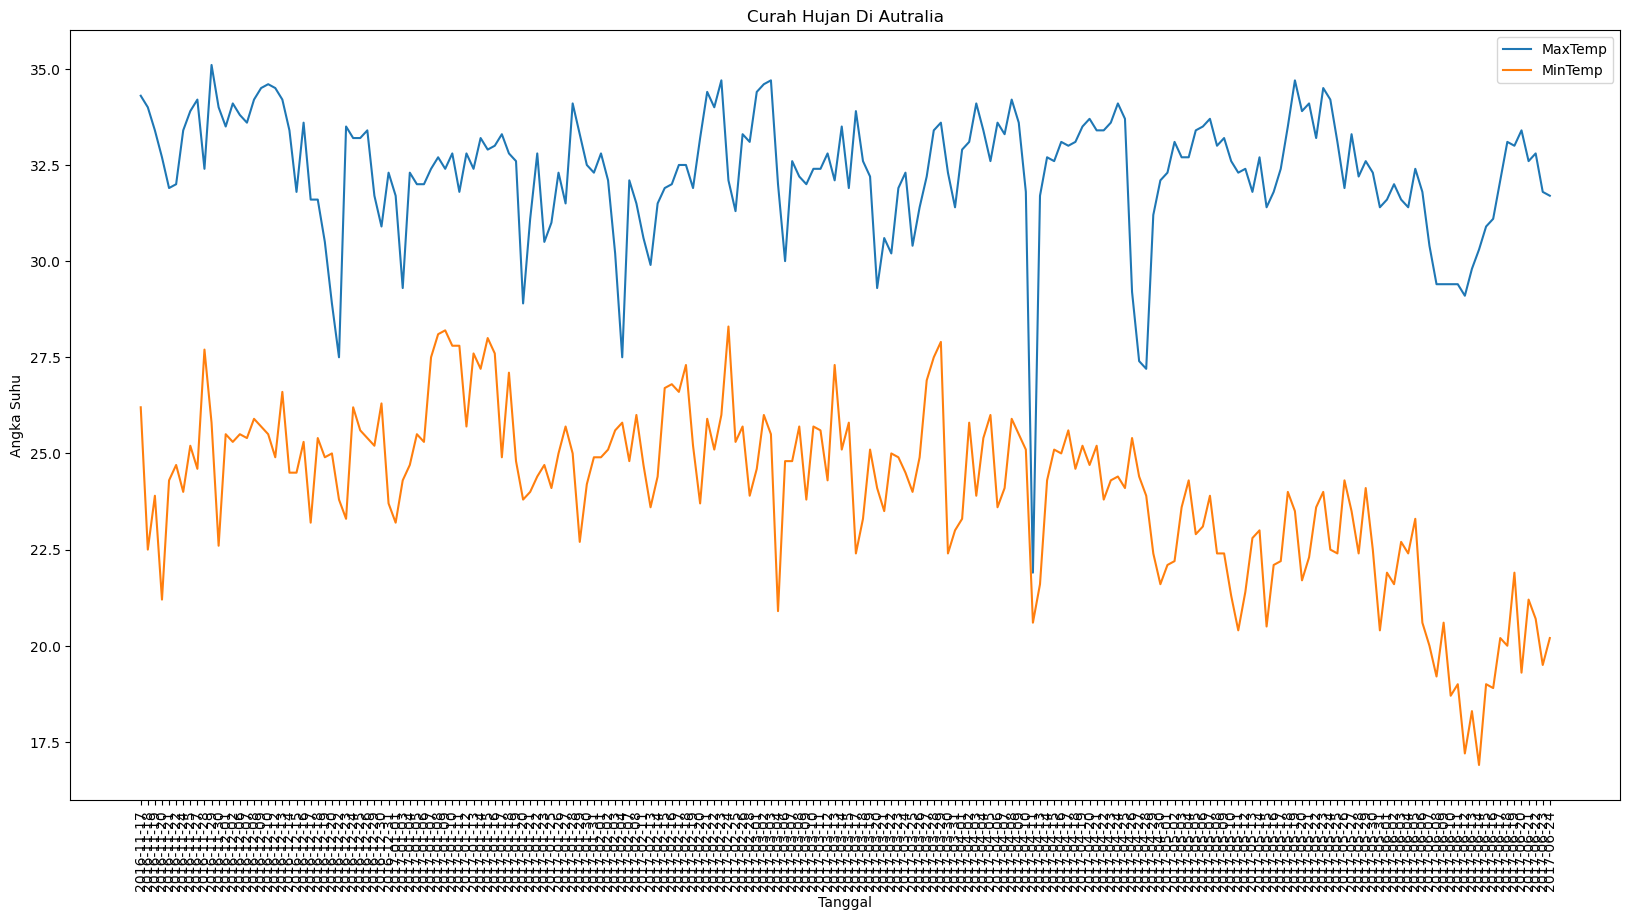

In [205]:
ax = plt.subplots(figsize=(20,10))
plt.plot(df['Date'].tail(200),df['MaxTemp'].tail(200))
plt.plot(df['Date'].tail(200),df['MinTemp'].tail(200))
plt.xticks(rotation=90)
plt.title("Curah Hujan Di Autralia")
plt.xlabel("Tanggal")
plt.ylabel("Angka Suhu")
plt.legend(['MaxTemp','MinTemp'])
plt.show()

<p><b>3.Memvisualisasikan Data menggunakan Histogram</b></p>

array([[<Axes: title={'center': 'Rainfall'}>]], dtype=object)

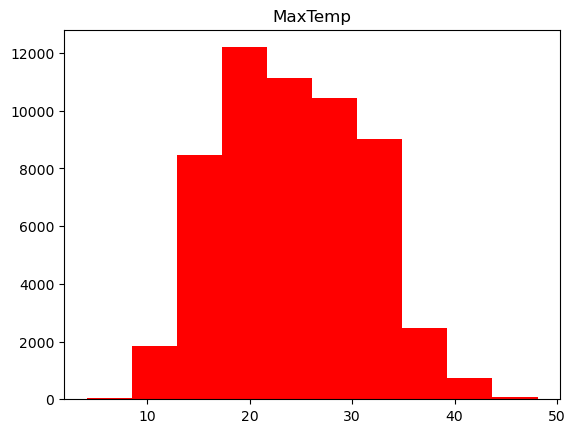

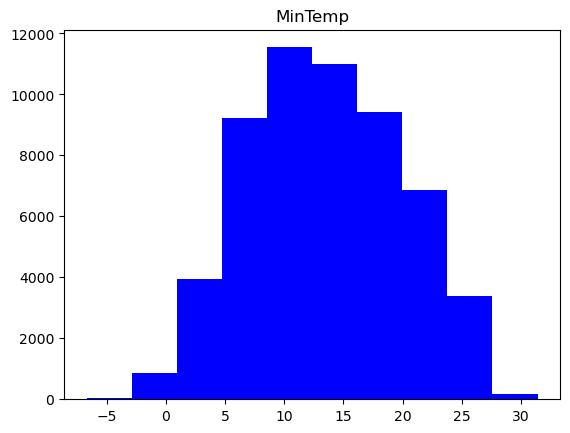

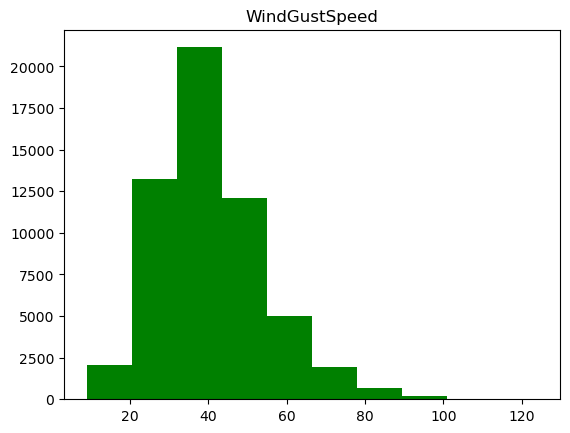

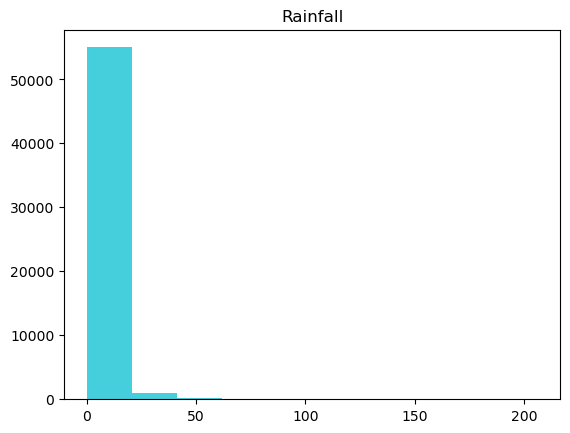

In [206]:
df.hist(column='MaxTemp',grid=False,color='r')
df.hist(column='MinTemp',grid=False,color='b')
df.hist(column='WindGustSpeed',grid=False,color='g')
df.hist(column='Rainfall',grid=False,color='#45CFDD')

<h3><b>KORELASI VARIABLE</b></h3>


<p><b>1.Melihat korelasi seluruh variabel</b></p>

In [208]:
df.corr()

/tmp/ipykernel_10217/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000
